<a href="https://colab.research.google.com/github/NatalieGo/MFTI_hackathon_1/blob/main/dataset_analysis_translated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
data = pd.read_csv('/content/dataset_unclean_translated.csv')
display(data)
display(data.info())

,Твитнуть,Самоубийство
0,готовлю обед,Не суицидный пост
1,@Alexia Тебе нужны его деньги.,Не суицидный пост
2,"@dizzyhrvy мне потребовалась целая вечность, ч...",Пост о потенциальном самоубийстве
3,"@jnaylor #kiwitweets Привет, Джер! С каких это...",Не суицидный пост
4,Пробуем «Вкусную библиотеку 2»; с неоднозначны...,Не суицидный пост
...,...,...
1782,"я забыл, как сильно я люблю свою Nokia N95-1",Не суицидный пост
1783,Начинаю свой день с позитива! Чтобы быть велик...,Не суицидный пост
1784,"@belledame222 Эй, сейчас 5 утра... отдай должн...",Не суицидный пост
1785,"Две пьяные подруги вваливаются в мою комнату, ...",Не суицидный пост


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Твитнуть      1787 non-null   object
 1   Самоубийство  1787 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


None

В данном датасете информация о 1787 твитах (англоязычных пользователей, переведенных на русский язык), которые проходили оценку и распределялись по 2м категориям: «Не суицидный пост» и «Пост о потенциальном самоубийстве»
Содержит 1787 строк, 2 столбца («Твитнуть» и «Самоубийство» ), оба столбца имеют тип object. Дата сет в столбце «Твитнуть» содержит лишние данные в качестве ссылок на твит. В том числе не читаемые символы.

In [ ]:
#Идентификация пропущенных значений (NaN, NULL, пустых строк и т. д.) в датафрейме
filtered_colums = data.eq("").sum()
display(filtered_colums)

Твитнуть        0
Самоубийство    0
dtype: int64

Идентификация пропущенных значений (NaN, NULL, пустых строк и т. д.) в датафрейме. По результатам проверки пустых строк в датафрейме нет.
Идентификация выбросов данных. Вводим дамми переменные для столбца «самоубийство» для удобства оценки. И переводим в двоичный код.

In [ ]:
# вводим дамми переменные для преобразования категориальных признаков в числовые для подсчета данных
data['Самоубийство']= data['Самоубийство'].astype(str)
data_dummies = pd.get_dummies(data['Самоубийство'], drop_first=True, dummy_na=False)
display(data_dummies)

,Пост о потенциальном самоубийстве
0,False
1,False
2,True
3,False
4,False
...,...
1782,False
1783,False
1784,False
1785,False


In [ ]:
#Посчитаем сколько постов относятся к  «Пост о потенциальном самоубийстве»
data_dummies = pd.get_dummies(data['Самоубийство'], drop_first=True, dummy_na=False)
bool_counts = data_dummies.select_dtypes(include='bool').apply(lambda x: x.value_counts())
display(bool_counts)
# изменяем булевые переменные на двоичный код (1 и 0), для удобного подсчета в графике
data_dummies['Пост о потенциальном самоубийстве'] = data_dummies['Пост о потенциальном самоубийстве'].astype(int)
display(data_dummies['Пост о потенциальном самоубийстве'])


,Пост о потенциальном самоубийстве
Пост о потенциальном самоубийстве,
False,1127
True,660


0       0
1       0
2       1
3       0
4       0
       ..
1782    0
1783    0
1784    0
1785    0
1786    0
Name: Пост о потенциальном самоубийстве, Length: 1787, dtype: int64

Посчитаем сколько постов относятся к  «Пост о потенциальном самоубийстве», получаем что : «Не суицидный пост» - 1127  и «Пост о потенциальном самоубийстве» - 660

Text(0.5, 1.0, 'Suicide')

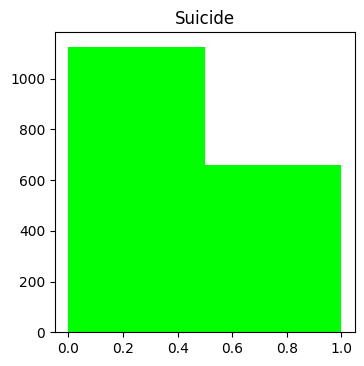

In [ ]:
# построим гистограмму для того, чтобы оценить наличие или отсутствие выбросов данных
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0,0,1,1])
axes.hist(x=data_dummies['Пост о потенциальном самоубийстве'], label= ['Suicide'], color = 'lime', bins = 2)
axes.set_title('Suicide')

Как и предполагалось в связи с наличием только 2х параметров, выбросов не наблюдается.
Удаляем ссылки на твиты. Удаляем лишние символы. И ники пользователей начинающиеся на @.

In [ ]:
# используем IPython.display для красивого вывода всего текста в таблице
from IPython.display import display, HTML
data['Твитнуть'] = data['Твитнуть'].replace(r'http[s]?://\S+|@\w+|/|&\w+|ð\w+|¶+|RT|aâ¦|@|w\w+|:|#\w+|_|-|ð|ó|¦|§|®|¥|¢|´|¿|Ã¯ÂÂ½', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].str.replace(r'^\,+', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].str.lstrip()
display(HTML(data.head(10).to_html()))

,Твитнуть,Самоубийство
0,готовлю обед,Не суицидный пост
1,Тебе нужны его деньги.,Не суицидный пост
2,"мне потребовалась целая вечность, чтобы собрать эту ерунду. я собираюсь пойти спать на несколько ДНЕЙ",Пост о потенциальном самоубийстве
3,"Привет, Джер! С каких это пор ты начал твиттерить?",Не суицидный пост
4,"Пробуем «Вкусную библиотеку 2»; с неоднозначными результатами. Штрихкод подумал, что я хочу добавить спортивный бюстгальтер вместо тренировки. Крутое приложение!",Не суицидный пост
5,"О, приятно это слышать. Но неужели все уже закончилось? Или вы продолжите это после Страстной недели?",Не суицидный пост
6,"у тебя есть список других ? Тебе придется поделиться этим, Амиго!",Не суицидный пост
7,"То, что Шейн снял о тебе сериал, не означает, что люди воспринимают тебя всерьез, да…",Пост о потенциальном самоубийстве
8,Пришло время расслабиться в варшавском пивном саду,Не суицидный пост
9,"Я ненавижу свою жизнь, я надеюсь, что скоро умру или умру, я слишком устал от всего",Пост о потенциальном самоубийстве


Очищенные данные вполне логичны и их можно использовать. НО при просмотре данных выявлены некачественные строки. Соответственно после предобработки, качество этой строки так же осталось неудовлетворительным - 499, 507, 538, 1004, 1019, 1049 - удалим



In [ ]:
#Удалим некачественные строки
data1 = data.drop(index=[497, 505, 536, 1002, 1017, 1047])

In [ ]:
#Снова посчитаем данные о количестве постов
data_dummies1 = pd.get_dummies(data1['Самоубийство'], drop_first=True, dummy_na=False)
bool_counts1 = data_dummies1.select_dtypes(include='bool').apply(lambda x: x.value_counts())
display(data1.info())
display(bool_counts1)

<class 'pandas.core.frame.DataFrame'>
Index: 1781 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Твитнуть      1781 non-null   object
 1   Самоубийство  1781 non-null   object
dtypes: object(2)
memory usage: 41.7+ KB


None

,Пост о потенциальном самоубийстве
Пост о потенциальном самоубийстве,
False,1124
True,657


Теперь дата сет содержит 1781 строку. Снова посчитаем данные о количестве постов в «Пост о потенциальном самоубийстве», получаем что : «Не суицидный пост» - 1124  и «Пост о потенциальном самоубийстве» - 657

In [ ]:
# сохраним новый вариант Датасета
data1.to_csv('/content/dataset_clean_translated.csv', index=False, sep=';')